# Devoir maison - ATIAM Fondamentals

This script defines the overall exercise for ATIAM structure course

 - Use this as a baseline script
 - You are authorized to define other files for functions
 - Write a (small) report document (PDF) explaining your approach
 - All your files should be packed in a zip file named
     [ATIAM][FpA2020]FirstName_LastName.zip

@author: esling

In [21]:
# Define mode (keep it on False, this is just for my generative part)
DEV_MODE=False
# Basic set of imports (here you can see if everything passes)
import os
import pickle
import string

#%% Here collect the whole set of tracks
if DEV_MODE:
    # Define MIDI extension
    midExt = ['mid', 'midi', 'MID', 'MIDI']
    # Root directory
    root = '/Users/esling/Coding/learning/orchestral-db/data'
    database = {}
    composers = []
    composers_tracks = {}
    tracks = []
    # List composers first
    for item in os.listdir(root):
        if os.path.isdir(os.path.join(root, item)):
            composers.append(item)
    print('Found ' + str(len(composers)) + ' composers.')
    prev_letter = ''
    # now parse tracks
    for comp in sorted(composers):
        # Print advance
        if (comp[0] != prev_letter):
            prev_letter = comp[0]
            print('   - Composers starting with ' + prev_letter)
        # Check each sub-folder
        for item in os.listdir(os.path.join(root, comp)):
            cur_path = os.path.join(os.path.join(root, comp), item)
            if os.path.isdir(cur_path):
                for files in os.listdir(cur_path):
                    if (os.path.splitext(files)[1][1:] in midExt):
                        tracks.append(item)
                        if comp in composers_tracks.keys():
                            composers_tracks[comp].append(item)
                        else:
                            composers_tracks[comp] = [item]
    print('Found ' + str(len(tracks)) + ' tracks.')
    midi_database = {'composers':composers, 'composers_tracks':composers_tracks}
    pickle.dump(midi_database, open("atiam-fpa.pkl", "wb"))
else:
    midi_database = pickle.load(open("atiam-fpa.pkl", "rb"))
    composers = midi_database['composers']
    composers_tracks = midi_database['composers_tracks']

# PART 1 - Exploring a track collections (text dictionnaries) and playing with MIDI

In this part, we will start easy by looking at a collection of tracks.
The set of classical music pieces is provided in the _atiam-fpa.pkl_ file, which
is already loaded at this point of the script and contain two structures
    - composers         = Array of all composers in the database
    - composers_tracks  = Hashtable of tracks for a given composer
    
Some examples of the content of these structures
## Names of composers
composers[23] => 'Abela, Placido'
composers[1210]  => 'Beethoven, Ludwig van'
## List of tracks for each composer
composers_tracks['Abela, Placido'] => ['Ave Maria(Meditation on Prelude No. 1 by J.S.Bach)']
composers_tracks['Beethoven, Ludwig van'] => ['Drinking Song', 'Sonatine No. 3 for Mandolin and Piano', ...]
## Retrieve the first track of 
composers_tracks['Beethoven, Ludwig van'][0] => 'Drinking Song'


In [40]:
# Here an example: print all composers with more than 10 tracks
for composer,tracks in sorted(composers_tracks.items()):
    if (len(tracks) >= 10):
        print(composer + ' : ' + str(len(tracks)) + ' tracks.')

Abel, Carl Friedrich : 27 tracks.
Aboyan, Gayk : 554 tracks.
Abt, Franz : 38 tracks.
Adam, Adolphe : 11 tracks.
Adson, John : 71 tracks.
Agincour, François d' : 15 tracks.
Agrell, Johan : 84 tracks.
Agricola, Alexander : 12 tracks.
Aguado, Dionisio : 28 tracks.
Ahle, Johann Rudolf : 18 tracks.
Aiblinger, Johann Kaspar : 18 tracks.
Aichinger, Gregor : 12 tracks.
Alain, Jehan : 13 tracks.
Albeniz, Isaac : 49 tracks.
Albert, Heinrich : 10 tracks.
Albinoni, Tomaso : 170 tracks.
Albrechtsberger, Johann Georg : 89 tracks.
Aleotti, Vittoria : 18 tracks.
Alexandra, Liana : 12 tracks.
Alink, Bert : 22 tracks.
Alkan, Charles-Valentin : 30 tracks.
Allegri, Lorenzo : 12 tracks.
Allison, Richard : 177 tracks.
Alsen, Wulf Dieter : 38 tracks.
Altenburg, Johann Ernst : 28 tracks.
Altenburg, Michael : 26 tracks.
Alıcıoğlu, Şafak : 75 tracks.
Ammer, Manfred : 114 tracks.
Anderson, Leigh : 10 tracks.
André, Johann Anton : 11 tracks.
Anglebert : 67 tracks.
Anonymous : 27 tracks.
Anonymus, .... : 899 t

Q-1.1 Re-implement one of the array sorting algorithm seen in class
        either bubble sort or quicksort
        (+1 point bonus for quicksort)


In [23]:
import numpy as np

def sort(array):
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        return sort(less)+equal+sort(greater)
    else:
        return array
    
print(sort(np.random.uniform(0,10,10)))

[1.8438525294565733, 2.535028870484873, 3.067451327167958, 3.930718857675064, 4.65247629010335, 5.272712890113718, 5.904440018405269, 6.230212026978791, 8.096652160425588, 9.911223107804968]


Q-1.2 Use your own algorithm to sort the collection of composers by decreasing number of tracks

In [24]:
composer_tracks = []

for composer,tracks in composers_tracks.items():
    add = [len(tracks),composer]
    composer_tracks.append(add)

sortedlist = list(reversed(sort(composer_tracks)))

for i in range(len(sortedlist)):
    print(sortedlist[i][1],' : ',sortedlist[i][0],' tracks.')


Rondeau, Michel  :  2720  tracks.
Gouin, Pierre  :  2333  tracks.
Knuth, Jürgen  :  1641  tracks.
Bach, Johann Sebastian  :  1463  tracks.
Mozart, Wolfgang Amadeus  :  1250  tracks.
Schubert, Franz  :  1083  tracks.
Bach, August Wilhelm  :  1004  tracks.
Handel, George Frideric  :  906  tracks.
Anonymus, ....  :  899  tracks.
Beethoven, Ludwig van  :  801  tracks.
Scarlatti, Alessandro  :  731  tracks.
Praetorius, Michael  :  708  tracks.
Haydn, Joseph  :  650  tracks.
Mondrup, Christian  :  631  tracks.
Brahms, Johannes  :  618  tracks.
Guilmant, Alexandre  :  594  tracks.
Schütz, Heinrich  :  558  tracks.
Aboyan, Gayk  :  554  tracks.
Brodersen, Fritz  :  544  tracks.
Telemann, Georg Philipp  :  541  tracks.
Schumann, Robert  :  536  tracks.
Upton, Dillon  :  519  tracks.
Chopin, Frederic  :  519  tracks.
Grayson, Martin  :  500  tracks.
Dowland, John  :  479  tracks.
Mendelssohn Bartholdy, Felix  :  466  tracks.
Wiberg, Steve  :  423  tracks.
Dandrieu, Jean-François  :  413  trac

Q-1.3 Extend your sorting procedure, to sort all tracks from all composers alphabetically 

In [25]:
from itertools import chain

tracks_list = []

for composer,tracks in composers_tracks.items():
    tracks_list.append(tracks)

flatten_list = list(chain.from_iterable(tracks_list))
sorted_list = sorted(flatten_list)

print(len(sorted_list))

for i in range(len(sortedlist)):
    print(sorted_list[i])

85213
 Ostia 
 REMIX AE I 
 Tritto 
!st Piece
"A Bit of Everything" by De Rougemont
"A tanto duol, quest' anima"   from  "Bianca e Fernando"
"Abendruhe" (In turn, silent night has surrounded our circle)
"Agnus Dei" from the Coronation Mass (Low Version)
"Air on the G String" from Orchestral Suite No. 2 in D Major, arr.
"Air on the G String" from Orchestral Suite No. 3 in D Major
"Air on the G String" from Suite in D Major
"All the ends of the earth"
"Always Tuesdays!"
"Auf der grunen Wiese" from "Musical Stories"
"Ave Maria" for Solo Vocal and Organ
"Ballonreise" from "Musical Stories"
"Behold, God is my Salvation" Canon for Year Motto 2002 [Isaiah 12:2]
"By force" Polka
"Das Bild" from "Musical Stories"
"Das Lied vom Glucke" by A. G. von Halem
"Das Madchen aus der Fremde" (in Three Tons)
"Das Madchen vom Lande" by Gleim
"Das gestoerte Glueck by Theodor Koerner
"Das ist meine Freude" Canon for the Year's Motto of 2014 [Ps. 73,28]
"Der Geist hilft unser Schwachheit auf" 2nd mvt "Der abe

MIDI part - In addition to the pickle file, you can find some example MIDI
files in the atiam-fpa/ folder.

Here we are going to import and plot the different MIDI files. We recommend
to use the pretty_midi library 
pip install pretty_midi
But you can rely on any method (even code your own if you want)


Q-1.4 Import and plot some MIDI files

Based on the provided MIDI files (random subset of Beethoven tracks), try
to import, plot and compare different files

In [26]:
import pretty_midi as pm

def read_midifile(file_num):
    return pm.PrettyMIDI("atiam-fpa/beethoven_" +str(file_num)+".mid")

midi_data = read_midifile(1)


C:\Users\hdesv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


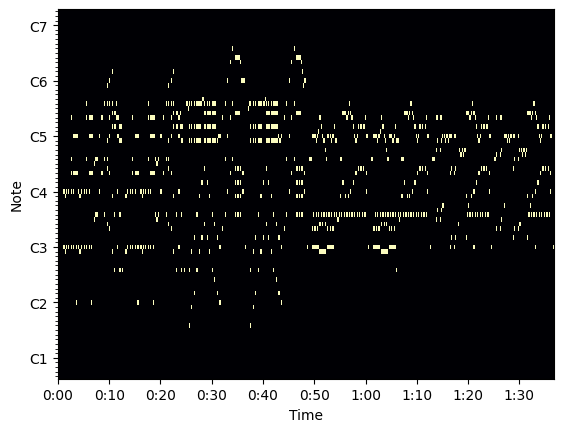

In [27]:
from librosa import display

def plot_piano_roll(midi_data, start_pitch, end_pitch, fs=100):
    display.specshow(midi_data.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pm.note_number_to_hz(start_pitch))

plot_piano_roll(midi_data, 20, 100)

Q-1.5 Compute the number of notes in a MIDI and sort the collection

First write a function counting the number of notes played in a given MIDI
file. Then, sort the set of MIDI files based on the number of notes.

In [28]:
files =[0,1,2,3,5,6,7,8,9,10,11,13,14,16,18,19,20,21,22,23,24,25,26,27,29]
list1 = []

for i in files:
    midi_data = read_midifile(i)
    pianoroll = midi_data.get_piano_roll()
    add = [np.count_nonzero(pianoroll),i]
    list1.append(add)

sortedlist = list(reversed(sort(list1)))

for i in range(len(sortedlist)):
    print("beethoven_",str(sortedlist[i][1]),".mid",' : ',sortedlist[i][0],' notes')

C:\Users\hdesv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


beethoven_ 13 .mid  :  866941  notes
beethoven_ 29 .mid  :  537436  notes
beethoven_ 26 .mid  :  226645  notes
beethoven_ 3 .mid  :  121073  notes
beethoven_ 21 .mid  :  120845  notes
beethoven_ 24 .mid  :  101003  notes
beethoven_ 18 .mid  :  68507  notes
beethoven_ 5 .mid  :  58151  notes
beethoven_ 22 .mid  :  53556  notes
beethoven_ 19 .mid  :  51932  notes
beethoven_ 27 .mid  :  47032  notes
beethoven_ 25 .mid  :  44099  notes
beethoven_ 9 .mid  :  35848  notes
beethoven_ 20 .mid  :  33881  notes
beethoven_ 6 .mid  :  30022  notes
beethoven_ 7 .mid  :  28409  notes
beethoven_ 2 .mid  :  28409  notes
beethoven_ 14 .mid  :  25372  notes
beethoven_ 16 .mid  :  23955  notes
beethoven_ 11 .mid  :  22265  notes
beethoven_ 10 .mid  :  20701  notes
beethoven_ 8 .mid  :  19602  notes
beethoven_ 1 .mid  :  19602  notes
beethoven_ 0 .mid  :  15020  notes
beethoven_ 23 .mid  :  13863  notes


# PART 2 - Symbolic alignments and simple text dictionnaries

In this part, we will use our knowledge on computer structures to solve a very 
well-known problem of string alignement. Hence, this part is split between
  1 - Implement a string alignment 
  2 - Try to apply this to a collection of classical music pieces names
  3 - Develop your own more adapted procedure to have a matching inside large set
  
The set of classical music pieces is provided in the atiam-fpa.pkl file, which
is already loaded at this point of the script and contain two structures
    - composers         = Array of all composers in the database
    - composers_tracks  = Hashtable of tracks for a given composer
    
Some examples of the content of these structures

composers[23] => 'Abela, Placido'
composers[1210]  => 'Beethoven, Ludwig van'

composers_tracks['Abela, Placido'] => ['Ave Maria(Meditation on Prelude No. 1 by J.S.Bach)']
composers_tracks['Beethoven, Ludwig van'] => ['"Ode to Joy"  (Arrang.)', '10 National Airs with Variations, Op.107 ', ...]

composers_tracks['Beethoven, Ludwig van'][0] => '"Ode to Joy"  (Arrang.)'

Q-2.1 Here perform your Needleman-Wunsch (NW) implementation.
    - You can find the definition of the basic NW here
    https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm
    - In this first version, we will be implementing the _basic_ gap costs
    - Remember to rely on a user-defined matrix for symbols distance

In [29]:
def QueryS(char1, char2, Smatrix, Smatrixlength):
    s1 = None
    s2 = None
    char1 = char1.upper()
    char2 = char2.upper()
    for p in range(0, Smatrixlength - 1):
        if Smatrix[0][p] == char1:
            s1 = p + 1
        if Smatrix[0][p] == char2:
            s2 = p + 1

    if s1 == None or s2 == None:
        if (char1 and char2) in (' ', '_'):
            result = int(max(Smatrix[1][1:]))
        else:
            if '*' in Smatrix[0][:]:
                for p in range(0, Smatrixlength - 1):
                    if Smatrix[0][p] == '*':
                        s1 = p

                if char1.upper() == char2.upper():
                    result = int(Smatrix[s1][s1])
                else:
                    result = int(min(Smatrix[:][s1]))
            else:
                result = int(min(Smatrix[1][1:]))
    else:
        result = int(Smatrix[s1][s2])
    return result

In [30]:
# Question 1 - Reimplementing the simple NW alignment 

def my_needleman_simple(str1, str2, matrix='atiam-fpa_alpha.dist', gap=-2):
    l_str1 = len(str1)
    l_str2 = len(str2)
    nw_matrix = [[0 for col in range(l_str2 + 1)] for row in range(l_str1 + 1)]
    with open(matrix) as (f):
        Smatrix = list((line.split() for line in f if not line.startswith('#')))
    Smatrixlength = len(Smatrix[0])
    for i in range(1, l_str1 + 1):
        nw_matrix[i][0] = i * gap

    for j in range(1, l_str2 + 1):
        nw_matrix[0][j] = j * gap

    for i in range(1, l_str1 + 1):
        for j in range(1, l_str2 + 1):
            Match = nw_matrix[(i - 1)][(j - 1)] + QueryS(str1[(i - 1)], str2[(j - 1)], Smatrix, Smatrixlength)
            Delete = nw_matrix[(i - 1)][j] + gap
            Insert = nw_matrix[i][(j - 1)] + gap
            nw_matrix[i][j] = max(Match, Delete, Insert)

    align_str1 = ''
    align_str2 = ''
    i = l_str1
    j = l_str2
    score = int(nw_matrix[i][j])
    while i > 0 or j > 0:
        if i > 0 and j > 0 and nw_matrix[i][j] == nw_matrix[(i - 1)][(j - 1)] + QueryS(str1[(i - 1)], str2[(j - 1)], Smatrix, Smatrixlength):
            align_str1 = str1[(i - 1)] + align_str1
            align_str2 = str2[(j - 1)] + align_str2
            i -= 1
            j -= 1
        elif i > 0 and nw_matrix[i][j] == nw_matrix[(i - 1)][j] + gap:
            align_str1 = str1[(i - 1)] + align_str1
            align_str2 = '-' + align_str2
            i -= 1
        elif j > 0 and nw_matrix[i][j] == nw_matrix[i][(j - 1)] + gap:
            align_str1 = '-' + align_str1
            align_str2 = str2[(j - 1)] + align_str2
            j -= 1

    return (
     align_str1, align_str2, score)

# Reference code for testing
from needleman import needleman_simple
aligned = needleman_simple("CEELECANTH", "PELICAN", matrix='atiam-fpa_alpha.dist', gap=-2)
print('Results for basic gap costs (linear)')
print(aligned[0])
print(aligned[1])
print('Score : ' + str(aligned[2])) 

Results for basic gap costs (linear)
CEELECANTH
-PELICAN--
Score : 13


In [59]:
# Question 2 - Applying this to a collection of musical scores
composer_tracks = []

for composer,tracks in composers_tracks.items():
    add = [tracks,composer]
    composer_tracks.append(add)

print(len(composer_tracks[16][0]))

print('Results for basic gap costs (linear)')
for i in range(len(composer_tracks[16][0])):
    aligned = needleman_simple(composer_tracks[16][0][0], composer_tracks[16][0][i], matrix='atiam-fpa_alpha.dist', gap=-2)
    print(aligned)

11
Results for basic gap costs (linear)
('Noel', 'Noel', 20)
('-N---oel-----', 'O hehre Nacht', -6)
('-N---oel-----', 'O hehre Nacht', -6)
('------------N-----o--el----------', 'Freunde, vernehmet die Geschichte', -38)
('--------------Noel', 'Cantique pour Noel', -8)
('-N-------o-----e--------l----------', "O heil'ge Nacht (Minuit, Chretiens)", -42)
('---------------N-oe----l------', 'Minuit chretien (O Holy Night)', -32)
('------------Noe--l', 'Cantique de Noël ', -8)
('--N----o------e-l', 'Minuit, chretiens', -14)
('--N----o------e-l', 'Minuit, chretiens', -14)
('--------------------------------------------------N-o------el-----', "Cantique de Noal, Minuit, chretiens, O holy night, O heil'ge Nacht", -104)


Q-2.2 Apply the NW algorithm between all tracks of each composer
    * For each track of a composer, compare to all remaining tracks of the same composer
    * Establish a cut criterion (what is the relevant similarity level ?) to only print relevant matches
    * Propose a set of matching tracks and save it through Pickle

In [68]:
print('Results for basic gap costs (linear)')

for f in range(len(composer_tracks)):
    for i in range(len(composer_tracks[f][0])):
        for j in range(len(composer_tracks[f][0])):
            if i != j:
                aligned = needleman_simple(composer_tracks[f][0][i], composer_tracks[f][0][j], matrix='atiam-fpa_alpha.dist', gap=-2)
                if aligned[2]>=0:
                    print(aligned)


Results for basic gap costs (linear)
('-----sonata_--e------_mino--r--_---1', 'Trio Sonata in B-flat major, WK 117 ', 24)
('-----sonata_--e------_mino--r--_---1', 'Trio Sonata in B-flat major, WK 117 ', 24)
('----sonat--a----_-e_-----minor_1', 'six_sonates_pour_le_clavecin_4_2', 24)
('----sonat--a----_-e_-----minor_1', 'six_sonates_pour_le_clavecin_6_1', 24)
('----sonat--a----_-e_-----minor_1', 'six_sonates_pour_le_clavecin_2_1', 24)
('-----sonat-a--_e_mino--r--_---1', 'Trio Sonata in E major, WK 119 ', 34)
('-----sonat-a--_e_mino--r--_---1', 'Trio Sonata in E major, WK 119 ', 34)
('----sonat--a----_-e_-----minor_1', 'six_sonates_pour_le_clavecin_5_1', 24)
('----sonat--a----_-e_-----minor_1', 'six_sonates_pour_le_clavecin_1_1', 24)
('----sonat--a----_-e_-----minor_1', 'six_sonates_pour_le_clavecin_3_2', 24)
('-----sonata_--e-_mino--r--_---1', 'Trio Sonata in C major, WK 120 ', 34)
('-----sonata_--e-_mino--r--_---1', 'Trio Sonata in C major, WK 120 ', 34)
('sonata_e_minor_1', 'sonata_e_

KeyboardInterrupt: 

Q-2.3 Extend your previous code so that it can compare
    * A given track to all tracks of all composers (full database)
    * You should see that the time taken is untractable (computational explosion)
    * Propose a method to avoid such a huge amount of computation
    * Establish a cut criterion (what is relevant similarity)
    * Propose a set of matching tracks and save it through Pickle

In [ ]:
################
# YOUR CODE HERE
################

# PART 3 - Extending the alignment algorithm and musical matching

You might have seen from the previous results that
        - Purely string matching on classical music names is not the best approach
        - This mostly comes from the fact that the importance of symbols is not the same
        - For instance 
            "Symphony for orchestra in D minor"
            "Symphony for orchestra in E minor"
          Looks extremely close but the key is the most important symbol
  
Another flaw in our approach is that the NW algorithm treats all gaps
equivalently. Hence, it can put lots of small gaps everywhere.
Regarding alignement, it would be better to have long coherent gaps rather
than small ones. This is handled by a mecanism known as _affine gap penalty_
which separates the costs of either _opening_ or _extending_ a gap. This
is known as the Gotoh algorithm, which can be found here :
    - http://helios.mi.parisdescartes.fr/~lomn/Cours/BI/Material2019/gap-penalty-gotoh.pdf


Q-3.1 Extending to a true musical name matching
    * Start by exploring the collection for well-known composers, what do you see ?
    * Propose a new name matching algorithm adapted to classical music piece names
        - Can be based on a rule-based system
        - Can be a pre-processing for symbol finding and then an adapted weight matrix
        - Can be a local-alignement procedure
        (These are only given as indicative ideas ...)
    * Implement this new comparison procedure adapted to classical music piece names
    * Re-run your previous results (Q-2.2 and Q-2.3) with this procedure

In [ ]:
################
# YOUR CODE HERE
################

# Example of creating a dummy matrix
if DEV_MODE:
    dist = open('atiam-fpa_alpha.dist', 'w')
    dist.write('   ')
    for m1 in string.ascii_uppercase:
        dist.write(m1)
        if (m1 < 'Z'):
            dist.write('  ')
    dist.write('\n')
    for m1 in string.ascii_uppercase:
        dist.write(m1 + '  ')
        for m2 in string.ascii_uppercase:
            if (m2 == m1):
                dist.write('5  ')
            else:
                dist.write('-3  ')
        dist.write('\n')
    dist.close()
    
    
'''

SyntaxError: incomplete input (3901538183.py, line 25)

Q-3.2 Extending the NW algorithm 
    * Add the affine gap penalty to your original NW algorithm
    * You can use the Gotoh algorithm reference
    * Verify your code by using the provided compiled version

In [ ]:
################
# YOUR CODE HERE
################

from needleman import needleman_affine
aligned = needleman_affine("CEELECANTH", "PELICAN", matrix='atiam-fpa_alpha.dist', gap_open=-5, gap_extend=-2)
print('Results for affine gap costs')
print(aligned[0])
print(aligned[1])
print('Score : ' + str(aligned[2]))


# PART 4 - Alignments between MIDI files and error-detection

Interestingly the problem of string alignment can be extended to the more global 
problem of aligning any series of symbolic information (vectors). Therefore,
we can see that the natural extension of this problem is to align any sequence
of symbolic information.

This definition matches very neatly to the alignement of two musical scores 
that can then be used as symbolic similarity between music, or score following.
However, this requires several key enhancements to the previous approach. 
Furthermore, MIDI files gathered on the web are usually of poor quality and 
require to be checked. Hence, here you will
    1 - Learn how to read and watch MIDI files
    2 - Explore their properties to perform some quality checking
    3 - Extend alignment to symbolic score alignement
    
To fasten the pace of your musical analysis, we will rely on the excellent 
Music21 library, which provides all sorts of musicological analysis and 
properties over symbolic scores. You will need to really perform this part
to go and read the documentation of this library online

In [ ]:
# Question 4 - Importing and plotting MIDI files (using Music21)

import math
import numpy as np
from music21 import converter

def get_start_time(el,measure_offset,quantization):
    if (el.offset is not None) and (el.measureNumber in measure_offset):
        return int(math.ceil(((measure_offset[el.measureNumber] or 0) + el.offset)*quantization))
    # Else, no time defined for this element and the functino return None

def get_end_time(el,measure_offset,quantization):
    if (el.offset is not None) and (el.measureNumber in measure_offset):
        return int(math.ceil(((measure_offset[el.measureNumber] or 0) + el.offset + el.duration.quarterLength)*quantization))
    # Else, no time defined for this element and the functino return None
    
def get_pianoroll_part(part,quantization):
    # Get the measure offsets
    measure_offset = {None:0}
    for el in part.recurse(classFilter=('Measure')):
        measure_offset[el.measureNumber] = el.offset
    # Get the duration of the part
    duration_max = 0
    for el in part.recurse(classFilter=('Note','Rest')):
        t_end = get_end_time(el,measure_offset,quantization)
        if(t_end>duration_max):
            duration_max=t_end
    # Get the pitch and offset+duration
    piano_roll_part = np.zeros((128,math.ceil(duration_max)))
    for this_note in part.recurse(classFilter=('Note')):
        note_start = get_start_time(this_note,measure_offset,quantization)
        note_end = get_end_time(this_note,measure_offset,quantization)
        piano_roll_part[this_note.midi,note_start:note_end] = 1
    return piano_roll_part

# Here we provide a MIDI import function
def importMIDI(f):
    piece = converter.parse(f)
    all_parts = {}
    for part in piece.parts:
        print(part)
        try:
            track_name = part[0].bestName()
        except AttributeError:
            track_name = 'None'
        cur_part = get_pianoroll_part(part, 16);
        if (cur_part.shape[1] > 0):
            all_parts[track_name] = cur_part;
    print('Returning')
    return piece, all_parts



################
# YOUR CODE HERE
################

Q-4.1 Exploring MIDI properties

The Music21 library propose a lot of properties directly on the piece element,
but we also provide separately a dictionary containing for each part a matrix
representation (pianoroll) of the corresponding notes (without dynamics).
    - By relying on Music21 documentation (http://web.mit.edu/music21/doc/)
        * Explore various musicology properties proposed by the library
        * Check which could be used to assess the quality of MIDI files

In [ ]:
# Here a few properties that can be plotted ...
piece.plot('scatter', 'quarterLength', 'pitch')
piece.plot('scatterweighted', 'pitch', 'quarterLength')
piece.plot('histogram', 'pitchClass')
# Here is the list of all MIDI parts (with a pianoroll matrix)
for key, val in sorted(all_parts.items()):
    print('Instrument: %s has content: %s ' % (key, val))

################
# YOUR CODE HERE
################

Q-4.2 Automatic evaluation of a MIDI file quality

One of the most pervasive problem with MIDI scores is that a large part of the
files that you can find on the internet are of rather low quality.
Based on your exploration in the previous questions and your own intuition,
    - Propose an automatic procedure that could evaluate the quality of a MIDI file.
    - Test how this could be used on a whole set of files

In [ ]:
################
# YOUR CODE HERE
################

Q-4.3 Extending your alignment algorithm to MIDI scores

As explained earlier, our alignment algorithm can work with any set of symbols,
which of course include even complex scores. The whole trick here is to see
that the "distance matrix" previously used could simply be replaced by a
"distance function", which can represent the similarity between any elements
    - Propose a fit distance measures between two slices of pianorolls
    - Modify your previous algorithm so that it can use your distance
    - Modify the algorithm so that it can work with MIDI files
    - Apply your algorithm to sets of MIDI files

In [ ]:
################
# YOUR CODE HERE
################

#%% Just for preparing a random set of MIDIs to help you out
if DEV_MODE:
    nb_track = 0;
    for val in np.random.randint(0, len(composers_tracks['Beethoven, Ludwig van']), 30):
        cur_track = composers_tracks['Beethoven, Ludwig van'][val]
        track_path = root + '/Beethoven, Ludwig van/' + cur_track + '/' + cur_track + '.mid'
        os.system('cp ' + track_path + ' atiam-fpa/beethoven_' + str(nb_track) + '.mid')
        print('cp "' + track_path + '" atiam-fpa/beethoven_' + str(nb_track) + '.mid')
        nb_track = nb_track + 1